<a href="https://colab.research.google.com/github/Educat8n/Deep-Learning-for-Computer-Vision-with-Python-and-Keras-TensorFlow-2.0/blob/main/Module1/TF_Keras_Functional_API_creating_models_ipynbt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## import packages
import tensorflow.keras as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, add, Embedding, Conv2DTranspose, GlobalMaxPooling2D, Input, UpSampling2D, Reshape, average

In [2]:
inputs = Input(shape=(32, 32, 3), name="img")
x = Conv2D(32, 3, activation="relu")(inputs)
x = Conv2D(64, 3, activation="relu")(x)
block_1_output = MaxPooling2D(3)(x)

x = Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = add([x, block_1_output])

x = Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = add([x, block_2_output])

x = Conv2D(64, 3, activation="relu")(block_3_output)
x = MaxPooling2D()(x)
outputs = Dense(10)(x)

model = Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   18496       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 9, 9, 64)     0           conv2d_1[0][0]                   
_________________________________________________________________________________________

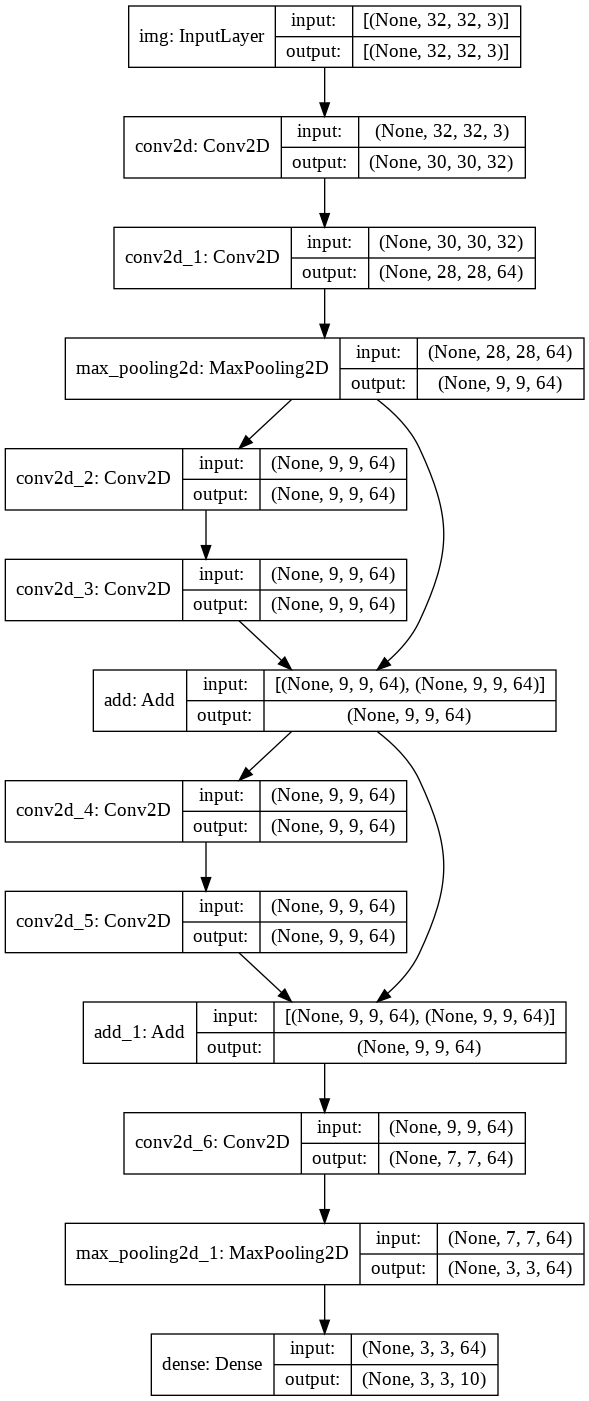

In [3]:
K.utils.plot_model(model, "toy-resnet.png", show_shapes=True)


In [4]:
# Embedding for 500 unique words mapped to 128-dimensional vectors
shared_embedding = Embedding(500, 128)

# Variable-length sequence of integers
text_input_a = Input(shape=(None,), dtype="string")

# Variable-length sequence of integers
text_input_b = Input(shape=(None,), dtype="string")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

prediction_a = Dense(5)(encoded_input_a)
prediction_b = Dense(10)(encoded_input_b)

model =  Model(inputs = [text_input_a, text_input_b], outputs= [prediction_a, prediction_b], name="shared_embedding")
model.summary()

Model: "shared_embedding"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 128)    64000       input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, None, 5)      645         embedding[0][0]   

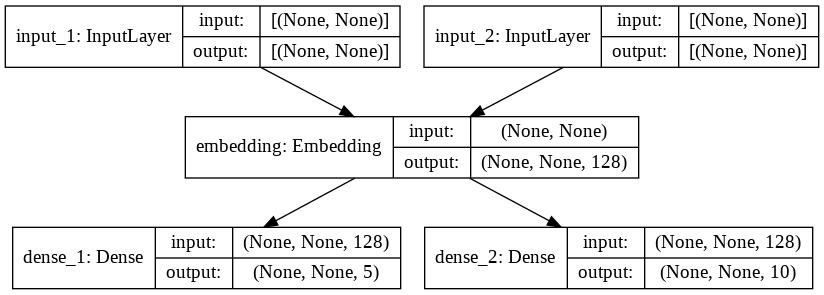

In [5]:
K.utils.plot_model(model, "shared_embedding.png", show_shapes=True)

In [6]:
encoder_input = Input(shape=(28, 28, 1), name="original_img")
x = Conv2D(16, 3, activation="relu")(encoder_input)
x = Conv2D(32, 3, activation="relu")(x)
x = MaxPooling2D(3)(x)
x = Conv2D(32, 3, activation="relu")(x)
x = Conv2D(16, 3, activation="relu")(x)
encoder_output = GlobalMaxPooling2D()(x)

encoder = Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = Input(shape=(16,), name="encoded_img")
x = Reshape((4, 4, 1))(decoder_input)
x = Conv2DTranspose(16, 3, activation="relu")(x)
x = Conv2DTranspose(32, 3, activation="relu")(x)
x = UpSampling2D(3)(x)
x = Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = Conv2DTranspose(1, 3, activation="relu")(x)

decoder = Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

autoencoder_input = Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

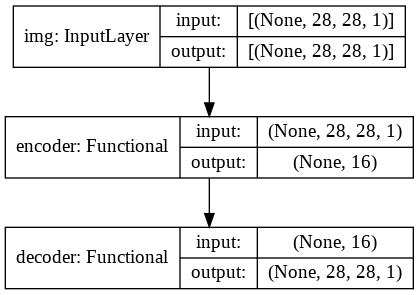

In [7]:
K.utils.plot_model(autoencoder, "autoencoder.png", show_shapes=True)